In [30]:
from google.colab import files
uploaded = files.upload()



In [31]:
import csv

# Đọc dữ liệu từ tệp CSV và lưu vào một danh sách
data = []
# nhập đúng tên file được upload (ví dụ ở dùng dùng file diamonds)
with open('housing.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Bỏ qua dòng tiêu đề nếu có
    for row in csvreader:
        data.append([float(row[0]), float(row[1]), float(row[2]), float(row[3]),  float(row[5]),float(row[6]),float(row[7]),float(row[8])])

data



[[-122.23, 37.88, 41.0, 880.0, 322.0, 126.0, 8.3252, 452600.0],
 [-122.22, 37.86, 21.0, 7099.0, 2401.0, 1138.0, 8.3014, 358500.0],
 [-122.24, 37.85, 52.0, 1467.0, 496.0, 177.0, 7.2574, 352100.0],
 [-122.25, 37.85, 52.0, 1274.0, 558.0, 219.0, 5.6431, 341300.0],
 [-122.25, 37.85, 52.0, 1627.0, 565.0, 259.0, 3.8462, 342200.0],
 [-122.25, 37.85, 52.0, 919.0, 413.0, 193.0, 4.0368, 269700.0],
 [-122.25, 37.84, 52.0, 2535.0, 1094.0, 514.0, 3.6591, 299200.0],
 [-122.25, 37.84, 52.0, 3104.0, 1157.0, 647.0, 3.12, 241400.0],
 [-122.26, 37.84, 42.0, 2555.0, 1206.0, 595.0, 2.0804, 226700.0],
 [-122.25, 37.84, 52.0, 3549.0, 1551.0, 714.0, 3.6912, 261100.0],
 [-122.26, 37.85, 52.0, 2202.0, 910.0, 402.0, 3.2031, 281500.0],
 [-122.26, 37.85, 52.0, 3503.0, 1504.0, 734.0, 3.2705, 241800.0],
 [-122.26, 37.85, 52.0, 2491.0, 1098.0, 468.0, 3.075, 213500.0],
 [-122.26, 37.84, 52.0, 696.0, 345.0, 174.0, 2.6736, 191300.0],
 [-122.26, 37.85, 52.0, 2643.0, 1212.0, 620.0, 1.9167, 159200.0],
 [-122.26, 37.85, 50.0

In [32]:
import numpy as np

# Chọn số lượng cụm (K) bạn muốn tạo
K = 4

# Khởi tạo các centroid ban đầu bằng cách chọn ngẫu nhiên K điểm từ dữ liệu
centroids = np.array(data)[np.random.choice(len(data), K, replace=False)][:, :-1]  # Lấy tất cả cột trừ cột cuối

# Số lần lặp tối đa
num_iterations = 100

for iteration in range(num_iterations):
    # Tính khoảng cách giữa mỗi điểm dữ liệu và các centroid
    distances = np.sqrt(np.sum((np.array(data)[:, np.newaxis, :-1] - centroids) ** 2, axis=2))

    # Gán mỗi điểm dữ liệu vào cụm gần nhất
    cluster_assignments = np.argmin(distances, axis=1)

    # Lưu trữ các centroid cũ để so sánh với các centroid mới
    old_centroids = centroids.copy()

    # Cập nhật các centroid cho từng cụm
    for cluster in range(K):
        cluster_points = np.array(data)[cluster_assignments == cluster][:, :-1]
        if len(cluster_points) > 0:
            centroids[cluster] = np.mean(cluster_points, axis=0)

    # Kiểm tra điều kiện dừng
    if np.all(centroids == old_centroids):
        break


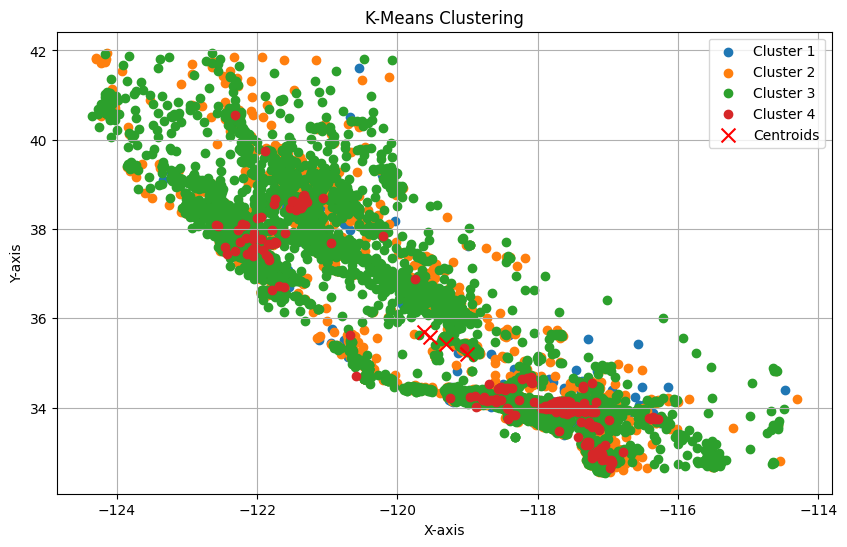

In [33]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để hiển thị cụm và centroid
plt.figure(figsize=(10, 6))

# Vẽ các điểm dữ liệu theo từng cụm
for cluster in range(K):
    cluster_points = np.array(data)[cluster_assignments == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}')

# Vẽ các centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

